In [22]:
import numpy as np

In [15]:
class AdamOptimizer:
    def __init__(self, weights, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0
        self.theta = weights

    def backward_pass(self, gradient):
        self.t = self.t + 1
        self.m = self.beta1*self.m + (1 - self.beta1)*gradient
        self.v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
        m_hat = self.m/(1 - self.beta1**self.t)
        v_hat = self.v/(1 - self.beta2**self.t)
        self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))
        return self.theta

In [35]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size,ep=0):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        self.dummy = None
        self.ep = ep
    
        

    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        ep = self.ep
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        if(ep==0) : print("Input shape = {} Output shape = {}".format(x.shape,a1.shape))
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        if(ep==0) : print("Input shape = {} Output shape = {}".format(a1.shape,a2.shape))
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        if(ep==0) : print("Input shape = {} Output shape = {}".format(a2.shape,y_.shape))
        
        self.ep += 1
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,lr=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        ep = self.ep
        beta1 = 0.9
        beta2 = 0.999
        epsi = 10**(-8)
        

        #if(ep==0):
        vo1 = np.zeros(W1.shape)
        mo1 = np.zeros(W1.shape)
        vob1 = np.zeros(b1.shape)
        mob1 = np.zeros(b1.shape)
        vo2 = np.zeros(W2.shape)
        mo2 = np.zeros(W2.shape)
        vob2 = np.zeros(b2.shape)
        mob2 = np.zeros(b2.shape)
        vo3 = np.zeros(W3.shape)
        mo3 = np.zeros(W3.shape)
        vob3 = np.zeros(b3.shape)
        mob3 = np.zeros(b3.shape)
        #else : (vo1,mo1,vob1,mob1,vo2,mo2,vob2,mob2,vo3,mo3,vob3,mob3) = self.dummy
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        
        ep += 1
        mo1 = (mo1*beta1) + (1-beta1)*dw1 
        vo1 = (vo1*beta2) + (1-beta2)*(dw1**2)
        mo1_ = mo1/(1 - (beta1**ep))
        vo1_ = vo1/(1 - (beta2**ep))
        mob1 = (mob1*beta1) + (1-beta1)*db1 
        vob1 = (vob1*beta2) + (1-beta2)*(db1**2)
        mob1_ = mob1/(1 - (beta1**ep))
        vob1_ = vob1/(1 - (beta2**ep))
        
        mo2 = (mo2*beta1) + (1-beta1)*dw2 
        vo2 = (vo2*beta2) + (1-beta2)*(dw2**2)
        mo2_ = mo2/(1 - (beta1**ep))
        vo2_ = vo2/(1 - (beta2**ep))
        mob2 = (mob2*beta1) + (1-beta1)*db2 
        vob2 = (vob2*beta2) + (1-beta2)*(db2**2)
        mob2_ = mob2/(1 - (beta1**ep))
        vob2_ = vob2/(1 - (beta2**ep))
        
        mo3 = (mo3*beta1) + (1-beta1)*dw3 
        vo3 = (vo3*beta2) + (1-beta2)*(dw3**2)
        mo3_ = mo3/(1 - (beta1**ep))
        vo3_ = vo3/(1 - (beta2**ep))
        mob3 = (mob3*beta1) + (1-beta1)*db3 
        vob3 = (vob3*beta2) + (1-beta2)*(db3**2)
        mob3_ = mob3/(1 - (beta1**ep))
        vob3_ = vob3/(1 - (beta2**ep))
        
        self.model["W1"]  -= (lr*mo1_) / (np.sqrt(vo1_) - epsi)
        self.model['b1']  -= (lr*mob1_) / (np.sqrt(vob1_) - epsi)
        
        self.model["W2"]  -= (lr*mo2_) / (np.sqrt(vo2_) - epsi)
        self.model['b2']  -= (lr*mob2_) / (np.sqrt(vob2_) - epsi)
        
        self.model["W3"]  -= (lr*mo3_) / (np.sqrt(vo3_) - epsi)
        self.model['b3']  -= (lr*mob3_) / (np.sqrt(vob3_) - epsi)
        
        self.dummy = (vo1,mo1,vob1,mob1,vo2,mo2,vob2,mob2,vo3,mo3,vob3,mob3)
        self.ep = ep
        
        #Update the Model Parameters using Gradient Descent
        
        #self.model["W1"]  -= lr*dw1
        #self.model['b1']  -= lr*db1
        
        #self.model["W2"]  -= lr*dw2
        #self.model['b2']  -= lr*db2
        
        #self.model["W3"]  -= lr*dw3
        #self.model['b3']  -= lr*db3
        
        return np.dot(delta1,W1.T)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)


In [36]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [37]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
    

In [38]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
#from visualize import plot_decision_boundary

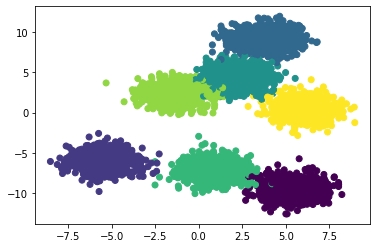

In [39]:
 X,Y = make_blobs(n_samples=5000,n_features=5,centers=7,random_state=10)
 plt.scatter(X[:,0],X[:,1], c=Y)

In [40]:

def train(X,Y,model,epochs,learning_rate,logs=True):
     training_loss = []
    
     classes = 7
     Y_OHT = one_hot(Y,classes)
     print(Y_OHT[0])
    
     for ix in range(epochs):
        
         Y_ = model.forward(X)
         l = loss(Y_OHT,Y_)
         training_loss.append(l)
         model.backward(X,Y_OHT,learning_rate)
        
         if(logs):
             print("Epoch %d Loss %.4f"%(ix,l))
            
    
     return training_loss

In [41]:
 X.shape,Y.shape

((5000, 5), (5000,))

In [43]:
 model = NeuralNetwork(input_size=5,layers=[4,3],output_size=7)
 train(X,Y,model,1000,0.001,logs=True)
 outputs = model.predict(X)

 training_accuracy = np.sum(outputs==Y)/Y.shape[0]
 print("Training Acc %.4f"%training_accuracy)

 #plot_decision_boundary(lambda x:model.predict(x),X,Y)
 #plt.show()


[0. 0. 0. 1. 0. 0. 0.]
Input shape = (5000, 5) Output shape = (5000, 4)
Input shape = (5000, 4) Output shape = (5000, 3)
Input shape = (5000, 3) Output shape = (5000, 7)
Epoch 0 Loss 0.5249
Epoch 1 Loss 0.5239
Epoch 2 Loss 0.5232
Epoch 3 Loss 0.5226
Epoch 4 Loss 0.5219
Epoch 5 Loss 0.5213
Epoch 6 Loss 0.5207
Epoch 7 Loss 0.5201
Epoch 8 Loss 0.5195
Epoch 9 Loss 0.5189
Epoch 10 Loss 0.5183
Epoch 11 Loss 0.5176
Epoch 12 Loss 0.5170
Epoch 13 Loss 0.5163
Epoch 14 Loss 0.5156
Epoch 15 Loss 0.5149
Epoch 16 Loss 0.5141
Epoch 17 Loss 0.5134
Epoch 18 Loss 0.5126
Epoch 19 Loss 0.5118
Epoch 20 Loss 0.5110
Epoch 21 Loss 0.5102
Epoch 22 Loss 0.5093
Epoch 23 Loss 0.5085
Epoch 24 Loss 0.5076
Epoch 25 Loss 0.5067
Epoch 26 Loss 0.5058
Epoch 27 Loss 0.5049
Epoch 28 Loss 0.5039
Epoch 29 Loss 0.5030
Epoch 30 Loss 0.5020
Epoch 31 Loss 0.5010
Epoch 32 Loss 0.5000
Epoch 33 Loss 0.4989
Epoch 34 Loss 0.4979
Epoch 35 Loss 0.4968
Epoch 36 Loss 0.4957
Epoch 37 Loss 0.4946
Epoch 38 Loss 0.4935
Epoch 39 Loss 0.4923
